In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
image_size=[150,150]


In [ ]:
train_path='/content/drive/MyDrive/Colab Notebooks/X-ray_Images/train'
test_path='/content/drive/MyDrive/Colab Notebooks/X-ray_Images/test'

In [ ]:

vgg=VGG16(input_shape=image_size+[3],weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:

for layer in vgg.layers:
  layer.trainable=False

In [ ]:

folders=glob('/content/drive/MyDrive/Colab Notebooks/X-ray_Images/train/*')
len(folders)

2

In [ ]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
    rotation_range=40,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.2,
    zca_whitening=False,
    horizontal_flip=True,
    fill_mode='nearest',
    shear_range=0.2,
    featurewise_center=False)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/X-ray_Images/train',
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/X-ray_Images/test',
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
163/163 [==============================] - 582s 3s/step - loss: 0.2604 - accuracy: 0.8907 - val_loss: 0.2769 - val_accuracy: 0.8910
Epoch 2/10
163/163 [==============================] - 114s 700ms/step - loss: 0.1808 - accuracy: 0.9289 - val_loss: 0.2634 - val_accuracy: 0.9038
Epoch 3/10
163/163 [==============================] - 114s 702ms/step - loss: 0.1707 - accuracy: 0.9342 - val_loss: 0.4468 - val_accuracy: 0.8365
Epoch 4/10
163/163 [==============================] - 114s 698ms/step - loss: 0.1649 - accuracy: 0.9358 - val_loss: 0.2424 - val_accuracy: 0.9167
Epoch 5/10
163/163 [==============================] - 114s 697ms/step - loss: 0.1488 - accuracy: 0.9434 - val_loss: 0.2386 - val_accuracy: 0.9151
Epoch 6/10
163/163 [==============================] - 114s 700ms/step - loss: 0.1389 - accuracy: 0.9498 - val_loss: 0.2332 - val_accuracy: 0.9167
Epoch 7/10
163/163 [==============================] - 114s 698ms/step - loss: 0.1432 - accuracy: 0.9465 - val_loss: 0.2308 - va

In [ ]:
print("Accuracy of the model is: ",model.evaluate(test_set)[1])
print("Loss of the model is: ",model.evaluate(test_set)[0])

20/20 [==============================] - 8s 414ms/step - loss: 0.2358 - accuracy: 0.9151
Accuracy of the model is:  0.9150640964508057
20/20 [==============================] - 9s 418ms/step - loss: 0.2358 - accuracy: 0.9151
Loss of the model is:  0.23583374917507172


In [ ]:
import tensorflow as tf
from keras.models import load_model

model.save('/content/transfer_model_pneumonia_prediction.h5')

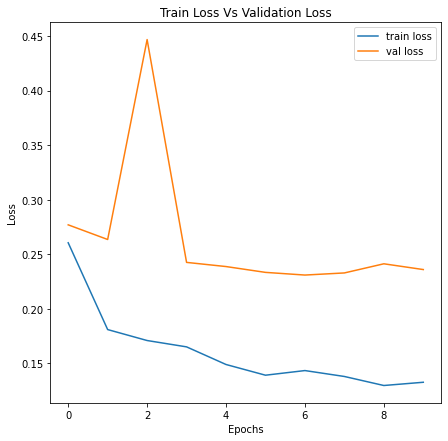

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss Vs Validation Loss')
plt.legend()
plt.show()


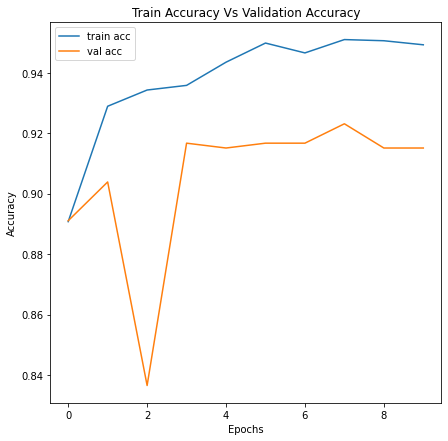

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy Vs Validation Accuracy')
plt.legend()
plt.show()
